# CSE4062 Data Science - Delivery #5

## Göksel Tokur - 150116049

## Arda Bayram-150116029

## Gülnihal Erdem - 150319554

## İrem Seçmen - 170219006

## Clustering

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

import nltk
import string

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')


# email module has some useful functions
import os, sys, email,re

df = pd.read_csv('data/training.1600000.processed.noemoticon.csv', header=None, encoding='latin', nrows=30000)
df.columns = ['label', 'id', 'date', 'query', 'user', 'tweet']

# Data reduction
df = df.drop(['id', 'date', 'query', 'user'], axis=1)

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
data = df['tweet']


tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english', max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [3]:
pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names()).head()

,00,000,0000,002,00am,00pm,01,02,026,02am,...,½sklov,½ssen,½sunday,½t,½tieï,½tobe,½u,½ve,½y,½ï
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


#normalized_mutual_info_score

def get_kmeans_metrics(kmeans, name, data, labels):
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
        metrics.normalized_mutual_info_score
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]


    results += [
        metrics.silhouette_score(data, estimator[-1].labels_, metric="euclidean", sample_size=300,)
    ]

    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}"
                        "\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))

In [5]:
from sklearn.cluster import KMeans

pca = PCA(n_components = 2)
pca_y = pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(pca_y)
prediction = kmeans.predict(pca_y)

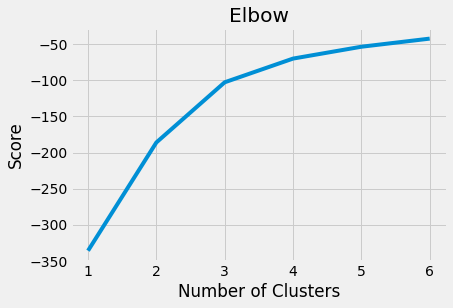

In [6]:
pca = PCA(n_components = 2)
pca_y = pca.fit_transform(tf_idf_array)

number_clusters = range(1, 7)

kmeans = [KMeans(n_clusters=i, max_iter = 1000) for i in number_clusters]

score = [kmeans[i].fit(pca_y).score(pca_y) for i in range(len(kmeans))]

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow')
plt.show()

## 2 Cluster

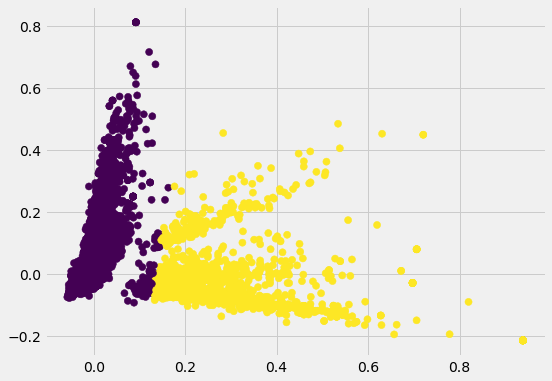

In [7]:
from sklearn.cluster import KMeans
pca = PCA(n_components = 2)
pca_y = pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=2, max_iter=1000, algorithm = 'auto')
fitted = kmeans.fit(pca_y)
prediction = kmeans.predict(pca_y)


plt.figure(figsize=(8,6))
plt.scatter(pca_y[:, 0], pca_y[:, 1], c=prediction, s=50, cmap='viridis')

In [8]:
def most_important_words_in_clusters(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label)
        x_means = np.mean(tf_idf_array[id_temp], axis = 0)
        sorted_means = np.argsort(x_means)[::-1][:n_feats]
        words = tf_idf_vectorizor.get_feature_names()
        best_words = [(words[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_words, columns = ['word', 'score'])
        dfs.append(df)
    return dfs

In [13]:
dfs = most_important_words_in_clusters(tf_idf_array, prediction, 20)

In [14]:
dfs[0]

,word,score
0,just,0.015132
1,day,0.012346
2,today,0.011476
3,like,0.010374
4,want,0.010060
5,going,0.010016
6,don,0.009887
7,really,0.009350
8,got,0.009332
9,sad,0.008994


In [15]:
dfs[1]

,word,score
0,work,0.302107
1,tomorrow,0.028365
2,day,0.027841
3,today,0.027249
4,going,0.023979
5,ready,0.017308
6,time,0.015752
7,home,0.015085
8,got,0.014318
9,want,0.014249


### Distribution Pie Chart

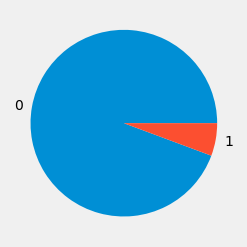

28300 1700


In [16]:
first = list(prediction).count(0)
second = list(prediction).count(1)

y = np.array([first, second])
mylabels = ["0", "1"]

plt.pie(y, labels = mylabels)
plt.show()
print(first, second)

### Evaluation Metrics

In [17]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tNMI\tsilhouette')

kmeans = KMeans(init="k-means++", n_clusters=2, n_init=4,
                random_state=0)
get_kmeans_metrics(kmeans=kmeans, name="k-means++", data=pca_y, labels=prediction)

kmeans = KMeans(init="random", n_clusters=2, n_init=4, random_state=0)
get_kmeans_metrics(kmeans=kmeans, name="random", data=pca_y, labels=prediction)

pca = PCA(n_components=2).fit(pca_y)
kmeans = KMeans(init=pca.components_, n_clusters=2, n_init=1)
get_kmeans_metrics(kmeans=kmeans, name="PCA-based", data=pca_y, labels=prediction)

init		time	inertia	homo	compl	v-meas	ARI	AMI	NMI	silhouette
k-means++	0.093s	38122	0.973	0.970	0.971	0.991	0.971	0.971	0.814
random   	0.108s	38122	0.975	0.970	0.972	0.991	0.972	0.972	0.749
PCA-based	0.050s	38985	0.011	0.010	0.010	0.068	0.010	0.010	0.723


## 3 Cluster

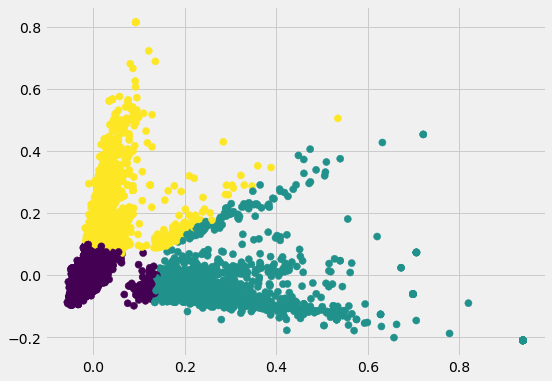

In [18]:
from sklearn.cluster import KMeans
pca = PCA(n_components = 3)
pca_y = pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=3, max_iter=1000, algorithm = 'auto')
fitted = kmeans.fit(pca_y)
prediction = kmeans.predict(pca_y)


plt.figure(figsize=(8,6))
plt.scatter(pca_y[:, 0], pca_y[:, 1], c=prediction, s=50, cmap='viridis')

### Distribution Pie Char

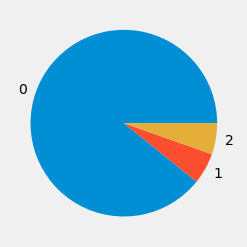

26584 1609 1609


In [19]:
first = list(prediction).count(0)
second = list(prediction).count(1)
third = list(prediction).count(1)

y = np.array([first, second, third])
mylabels = ["0", "1", "2"]

plt.pie(y, labels = mylabels)
plt.show()
print(first, second, third)

### Evaluation Metrics

In [20]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tNMI\tsilhouette')

kmeans = KMeans(init="k-means++", n_clusters=3, n_init=4,
                random_state=0)
get_kmeans_metrics(kmeans=kmeans, name="k-means++", data=pca_y, labels=prediction)

kmeans = KMeans(init="random", n_clusters=3, n_init=4, random_state=0)
get_kmeans_metrics(kmeans=kmeans, name="random", data=pca_y, labels=prediction)

pca = PCA(n_components=3).fit(pca_y)
kmeans = KMeans(init=pca.components_, n_clusters=3, n_init=1)
get_kmeans_metrics(kmeans=kmeans, name="PCA-based", data=pca_y, labels=prediction)

init		time	inertia	homo	compl	v-meas	ARI	AMI	NMI	silhouette
k-means++	0.172s	49102	0.455	0.426	0.440	0.471	0.440	0.440	0.681
random   	0.210s	49102	0.454	0.424	0.438	0.470	0.438	0.438	0.717
PCA-based	0.062s	49102	0.455	0.425	0.439	0.471	0.439	0.439	0.662


In [21]:
dfs = most_important_words_in_clusters(tf_idf_array, prediction, 20)

In [22]:
dfs[0]

,word,score
0,just,0.015528
1,like,0.010524
2,want,0.009992
3,don,0.009947
4,got,0.009460
5,really,0.009307
6,sad,0.008864
7,going,0.008797
8,miss,0.008738
9,know,0.008549


In [23]:
dfs[1]

,word,score
0,work,0.308336
1,tomorrow,0.027660
2,today,0.025722
3,going,0.024375
4,day,0.018545
5,ready,0.017846
6,time,0.016309
7,home,0.015314
8,got,0.014329
9,want,0.014295


In [24]:
dfs[2]

,word,score
0,day,0.199634
1,today,0.065946
2,school,0.059420
3,tomorrow,0.057504
4,going,0.028303
5,good,0.017077
6,long,0.015431
7,beautiful,0.013727
8,break,0.013477
9,bad,0.012683
